In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Simple Linear Regression

In [24]:
rng = np.random.RandomState(42)
X = rng.rand(50) * 10
print(X)

y = 2 * x - 1 + rng.rand(50)
print(y)

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
[ 7.460387   18.78941895 14.57937778 11.86799703  2.71827279  3.04176464
  0.25016475 16.51950578 11.06752752 13.48678189 -0.19963282 18.66954608
 16.47759033  3.60353554  2.91743385  3.21078628  5.22576908 10.29732561
  7.71345102  5.81146974 12.00930266  1.98859289  4.84841509  7.14269829
  8.82825703 15.4325264   3.76474599  9.35873342 11.20675711  0.04487731
 12.01400046  3.0337806   0.63192988 18.0412691  18.62362298 15.49313028
  5.

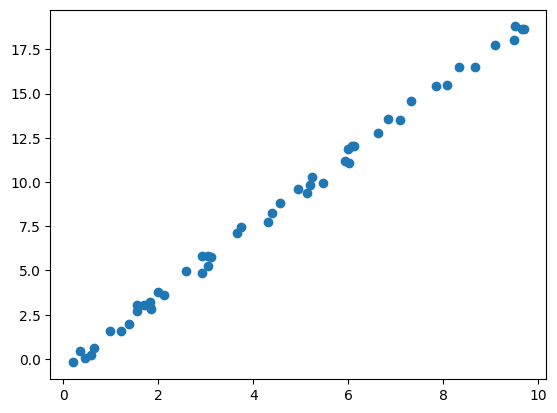

In [26]:
plt.scatter(X, y)

In [27]:
from sklearn.linear_model import LinearRegression

**LinearRegression** fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

**Parameters:**

**fit_intercept** :  **bool, default=True**

Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**copy_X** : **bool, default=True**

If True, X will be copied; else, it may be overwritten.

**n_jobs** : **int, default=None**

The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems.

**positive** : **bool, default=False**

When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

**Attributes:**

**coef_** : **array** of shape (n_features, ) or (n_targets, n_features)

Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

**rank_** : **int**

Rank of matrix X. Only available when X is dense.

**singular_** : **array** of shape (min(X, y),)

Singular values of X. Only available when X is dense.

**intercept_** : **float** or array of shape (n_targets,)

Independent term in the linear model. Set to 0.0 if fit_intercept = False.

**n_features_in_** : **int**

Number of features seen during fit.

Added in version 0.24.

**feature_names_in_** : **ndarray** of shape (n_features_in_,)

Names of features seen during fit. Defined only when X has feature names that are all strings.

In [28]:
model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


In [29]:
# Arrange data into a features matrix and target vector

# Here our target variable y is already in the correct form (a length-n_samples array), 
# but we need to massage the data x to make it a matrix of size [n_samples, n_features].

X = X[:, np.newaxis]

In [30]:
# Apply our model to the data. This can be done with the fit method of the model:

model.fit(X,y)

# This fit command causes a number of model-dependent internal computations to
# take place, and the results of these computations are stored in model-specific
# attributes that the user can explore.

# All model parameters that were learned during the fit process have trailing underscores


LinearRegression()

In [31]:
print(model.coef_)
print(model.intercept_)

# These two parameters represent the slope and intercept of the simple linear fit to the
# data. Comparing the results to the data definition, we see that they are close to the
# values used to generate the data: a slope of 2 and intercept of –1.

[2.00660766]
-0.5350275750800026


In [32]:
# Once the model is trained, the main task of supervised machine learning is to evalu‐
# ate it based on what it says about new data that was not part of the training set. In
# Scikit-Learn, this can be done using the predict method.

test_data = np.linspace(-1,11)
print(test_data)

[-1.         -0.75510204 -0.51020408 -0.26530612 -0.02040816  0.2244898
  0.46938776  0.71428571  0.95918367  1.20408163  1.44897959  1.69387755
  1.93877551  2.18367347  2.42857143  2.67346939  2.91836735  3.16326531
  3.40816327  3.65306122  3.89795918  4.14285714  4.3877551   4.63265306
  4.87755102  5.12244898  5.36734694  5.6122449   5.85714286  6.10204082
  6.34693878  6.59183673  6.83673469  7.08163265  7.32653061  7.57142857
  7.81632653  8.06122449  8.30612245  8.55102041  8.79591837  9.04081633
  9.28571429  9.53061224  9.7755102  10.02040816 10.26530612 10.51020408
 10.75510204 11.        ]


In [34]:
test_data = test_data[:,np.newaxis]
print(test_data)

[[-1.        ]
 [-0.75510204]
 [-0.51020408]
 [-0.26530612]
 [-0.02040816]
 [ 0.2244898 ]
 [ 0.46938776]
 [ 0.71428571]
 [ 0.95918367]
 [ 1.20408163]
 [ 1.44897959]
 [ 1.69387755]
 [ 1.93877551]
 [ 2.18367347]
 [ 2.42857143]
 [ 2.67346939]
 [ 2.91836735]
 [ 3.16326531]
 [ 3.40816327]
 [ 3.65306122]
 [ 3.89795918]
 [ 4.14285714]
 [ 4.3877551 ]
 [ 4.63265306]
 [ 4.87755102]
 [ 5.12244898]
 [ 5.36734694]
 [ 5.6122449 ]
 [ 5.85714286]
 [ 6.10204082]
 [ 6.34693878]
 [ 6.59183673]
 [ 6.83673469]
 [ 7.08163265]
 [ 7.32653061]
 [ 7.57142857]
 [ 7.81632653]
 [ 8.06122449]
 [ 8.30612245]
 [ 8.55102041]
 [ 8.79591837]
 [ 9.04081633]
 [ 9.28571429]
 [ 9.53061224]
 [ 9.7755102 ]
 [10.02040816]
 [10.26530612]
 [10.51020408]
 [10.75510204]
 [11.        ]]


In [35]:
y_pred = model.predict(test_data)

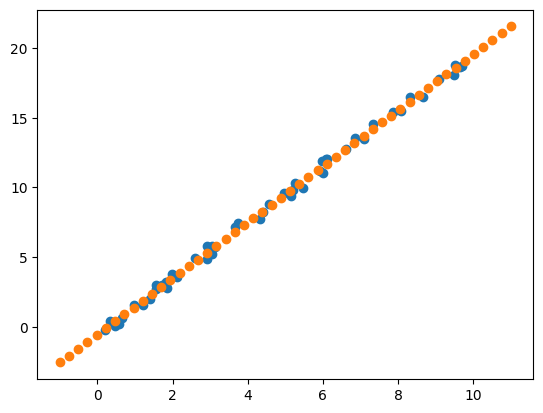

In [36]:
plt.scatter(X,y)
plt.scatter(test_data, y_pred)